In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


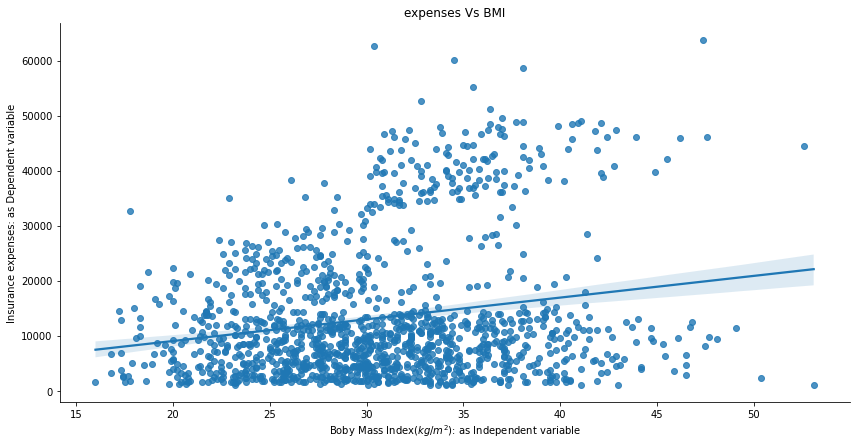

In [4]:
sns.lmplot(x='bmi',y='expenses',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance expenses: as Dependent variable')
plt.title('expenses Vs BMI');

In [5]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


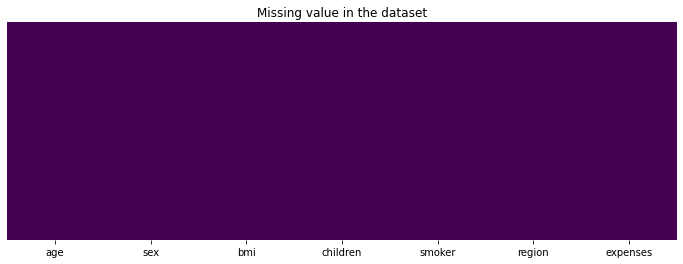

In [6]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

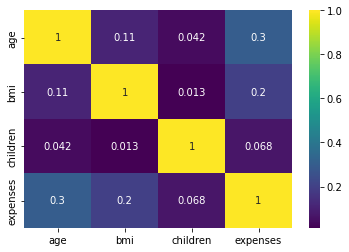

In [7]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='viridis');

/home/danyal/anaconda3/envs/tf/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/danyal/anaconda3/envs/tf/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


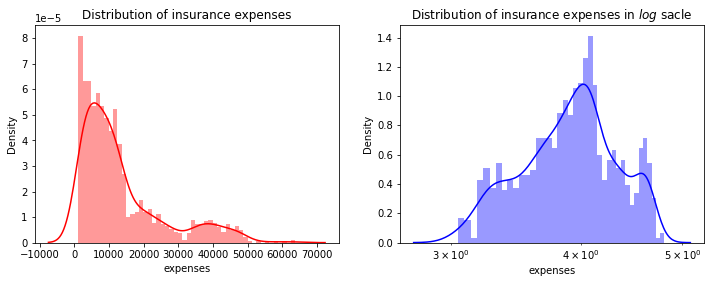

In [8]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['expenses'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance expenses')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['expenses']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance expenses in $log$ sacle')
ax.set_xscale('log');

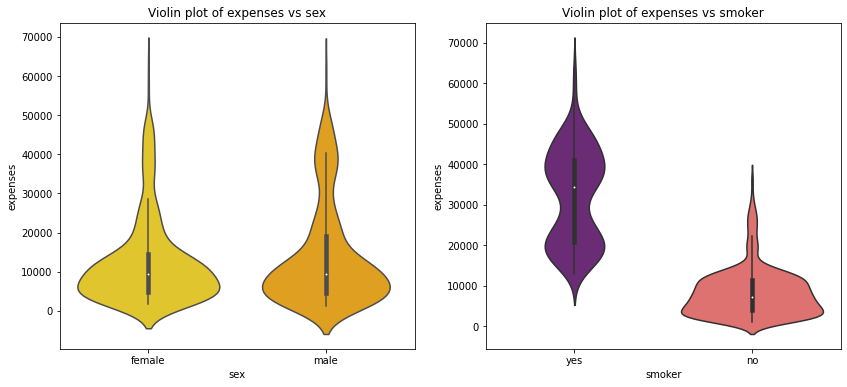

In [9]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='expenses',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of expenses vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='expenses',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of expenses vs smoker');

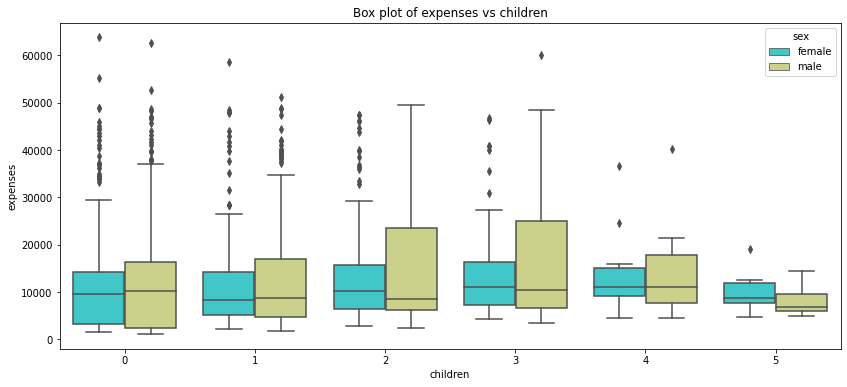

In [10]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='expenses',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of expenses vs children');

In [11]:
df.groupby('children').agg(['mean','min','max'])['expenses']

,mean,min,max
children,,,
0,12365.975767,1121.87,63770.43
1,12731.171821,1711.03,58571.07
2,15073.564000,2304.00,49577.66
3,15355.318535,3443.06,60021.40
4,13850.656800,4504.66,40182.25
5,8786.035556,4687.80,19023.26


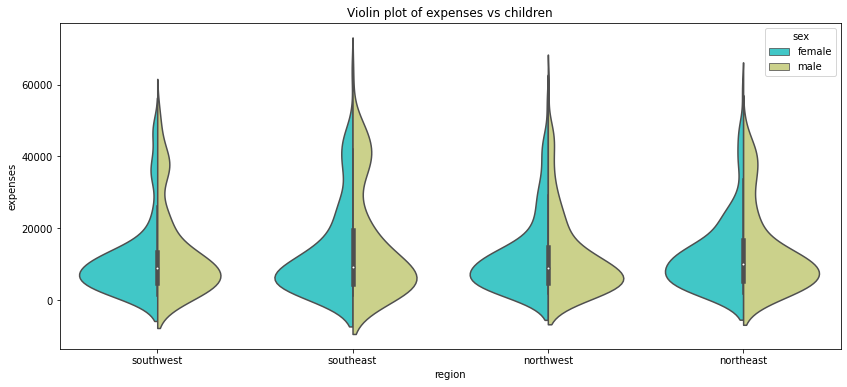

In [12]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='expenses',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of expenses vs children');

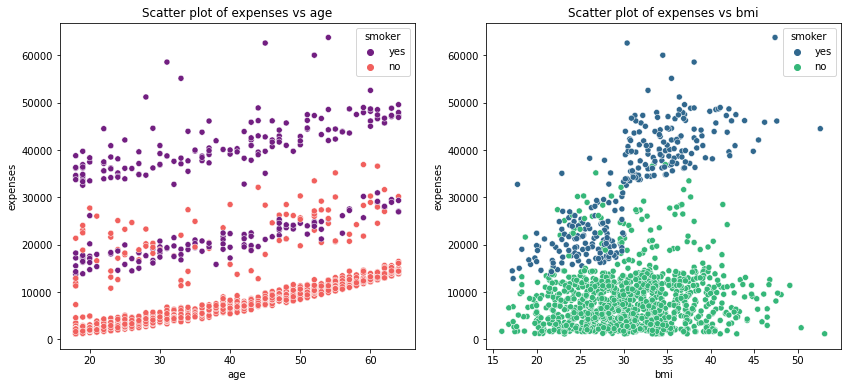

In [13]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='expenses',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of expenses vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='expenses',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of expenses vs bmi')
plt.savefig('sc.png');

In [14]:
categoriacal_variable = ['sex', 'children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df,columns=categoriacal_variable,drop_first=True, prefix = 'OHM', prefix_sep = '_', dtype='int8')

In [15]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'expenses']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'expenses' 'OHM_male' 'OHM_1' 'OHM_2' 'OHM_3' 'OHM_4' 'OHM_5'
 'OHM_yes' 'OHM_northwest' 'OHM_southeast' 'OHM_southwest']

Number of rows and columns in the dataset: (1338, 13)


In [16]:
from scipy.stats import boxcox
y_bc , lam , ci = boxcox(df_encode['expenses'], alpha=0.05)
ci , lam 

((-0.011402950284988304, 0.09880965012231949), 0.04364902969059508)

In [17]:
## Log transformer 
df_encode['expenses'] = np.log(df_encode['expenses'])

In [18]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('expenses',axis=1)
y = df_encode['expenses']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [19]:
np.c_[np.ones((X_train.shape[0],1)),X_train]

array([[ 1. , 31. , 30.5, ...,  0. ,  0. ,  0. ],
       [ 1. , 55. , 37.3, ...,  0. ,  0. ,  1. ],
       [ 1. , 31. , 28.6, ...,  1. ,  0. ,  0. ],
       ...,
       [ 1. , 29. , 25.6, ...,  0. ,  0. ,  1. ],
       [ 1. , 53. , 34.1, ...,  0. ,  0. ,  0. ],
       [ 1. , 46. , 33.7, ...,  0. ,  0. ,  0. ]])

In [20]:
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

theta = np.matmul(np.linalg.inv(np.matmul(X_train_0.T, X_train_0)), np.matmul(X_train_0.T, y_train))

In [21]:
X_train_0.shape[1]

13

In [23]:
parameters = ['theta'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({"Parameter":parameters, "Columns":columns, "theta": theta})

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name= 'Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta0,intersect:x_0=1,7.052997,7.052997
1,theta1,age,0.033264,0.033264
2,theta2,bmi,0.013856,0.013856
3,theta3,OHM_male,-0.067804,-0.067804
4,theta4,OHM_1,0.142542,0.142542
5,theta5,OHM_2,0.278561,0.278561
6,theta6,OHM_3,0.254820,0.254820
7,theta7,OHM_4,0.500931,0.500931
8,theta8,OHM_5,0.422040,0.422040
9,theta9,OHM_yes,1.550193,1.550193


In [25]:
# Normal Equation 
y_pred_norm = np.matmul(X_test_0, theta)
# Evaluation: MSE 
J_mse = np.sum((y_pred_norm - y_test)**2) / X_test_0.shape[0]


# R S_square
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)

R_square = 1 - (sse/sst)

print("The Mean of Square (MSE) or J(theta) :", J_mse)
print("R Square obtain for normal equation :", R_square)

The Mean of Square (MSE) or J(theta) : 0.1767305468975295
R Square obtain for normal equation : 0.8027634107495771


In [27]:
# sklearn regression Module 
y_pred_sk = lin_reg.predict(X_test)

# Evaluation: MSE 
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)


# R Square
R_square_error = lin_reg.score(X_test, y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_error)

The Mean Square Error(MSE) or J(theta) is:  0.17673054689752965
R square obtain for scikit learn library is : 0.802763410749577


/home/danyal/anaconda3/envs/tf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/danyal/anaconda3/envs/tf/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


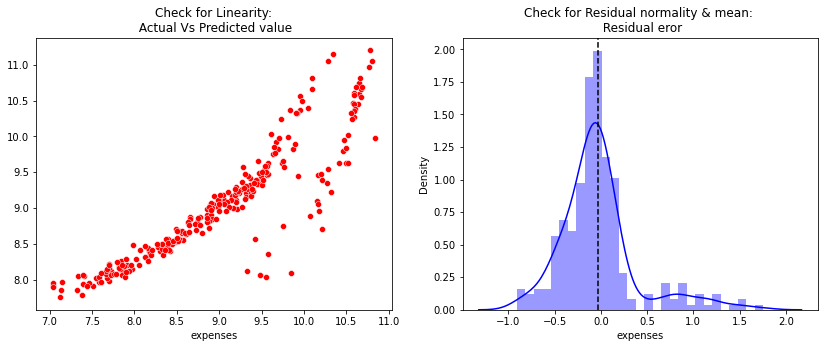

In [28]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

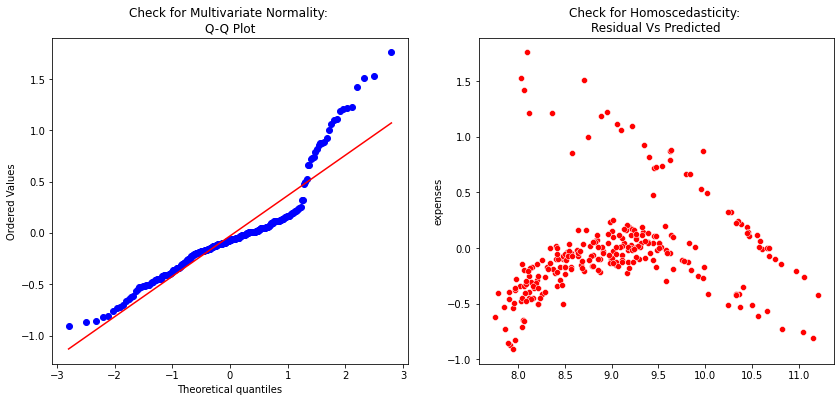

In [29]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [31]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_error)
VIF

5.070053197534977